In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pyjnius
!pip install konlp

from konlp.kma.klt2023 import klt2023

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import load_files
import pandas as pd
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle
import re
# import konlpy
from konlpy.tag import Hannanum,Komoran, Okt
import nltk
import numpy as np

news = load_files('/content/drive/MyDrive/newsData', shuffle=True)

labels = ['정치', '경제', '사회', '생활/문화', '세계', '기술/IT', '연예', '스포츠']

In [ ]:
data = news.data
target = news.target

In [ ]:
target

array([5, 1, 7, ..., 6, 2, 3])

In [ ]:
data = [x.decode('utf-8') for x in data]
data[3]

'냉랭한 멜라니아 … 트럼프와 각방 쓰고 휴일에도 따로\t트럼프 불륜설 뒤 일정 부쩍 달라져\n남편 집무실 웨스트윙엔 발길 끊어\n이스트윙서 아동문제 등 따로 챙겨\n이민 정책은 다른 목소리 내기도\n\n지난달 26일 아침 8시. 도널드 트럼프 미국 대통령은 ‘폭스 & 프렌즈’와 전화 인터뷰 도중 24년 어린 퍼스트레이디 멜라니아의 48번째 생일 선물을 챙기지 못했다는 걸 털어놨다. 그는 “예쁜 카드와 꽃을 줬다”며 “알다시피 선물을 찾으러 다니기엔 너무 바쁘지 않으냐”고 했다. 그러면서 “어쩌면 내가 그녀에게 마음을 그렇게 많이 쏟고 있지 않은지 모르겠다”고 덧붙였다.\xa0\n\n워싱턴포스트는 6일(현지시간) 트럼프와 멜라니아가 백악관에서 각방을 쓰며 별도 공간과 일정, 관심사를 갖고 독립된 생활을 하고 있다고 공개했다. 신문에 따르면 둘은 백악관 이스트윙(동관)의 관저에 있는 각자의 침실에서 아침을 맞는다. 트럼프가 새벽 5시 30분에 일어나 케이블방송 뉴스와 트위터로 일을 시작하는 것과 달리, 멜라니아는 자기 방에서 조금 더 잔 후, 12세 아들 배런의 숙제를 확인하고 메릴랜드주 포토맥의 명문 사립인 세인트 앤드루스 주교학교에 등교시키는 것으로 일과를 시작한다. 최근 남편과 포르노 배우 출신 스토미 대니얼스, 플레이보이 모델 캐런 맥두걸과의 스캔들이 불거진 후 더욱 아들의 양육과 조용한 일상의 독립 생활을 개척하고 있다는 것이다.\xa0\n\n트럼프는 지난해 1월 대통령 취임식부터 전통적인 대통령 가문의 틀을 깼다. 세 번째 부인 멜라니아가 취임 선서를 하는 남편 곁에 서 있는 동안 두 명의 전 부인인 이바나 트럼프와 말라 메이플스도 청중석에서 이를 지켜봤다. 멜라니아는 아들 배런이 다니던 학교에서 학기를 마치도록 6개월 간 뉴욕에서 생활하며 백악관 입주도 미뤘다.\xa0\n\n멜라니아는 입주한 뒤로 남편의 집무실이 있는 웨스트윙(서관)과 사실상 벽을 세웠다. 같은 모델 출신이자 의붓딸인 이방카 백악관 선임보좌관 사무실이 있는 쪽으로 좀처럼 건너가지 않

In [ ]:
target.shape

(1600,)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,0
0,태양광으로 충전되는 ‘아이폰X 테슬라’\t(지디넷코리아=이정현 기자)도널드 트럼프 ...
1,돈 꽃다발' '돈 케이크'…현금 선호 뚜렷한 어버이날 선물 새 풍경\t[앵커]\n어...
2,"[월드 스누커] 이대규, 유망주 왕즈펑 꺾고 3라운드 진출\t[엠스플뉴스]\n \n..."
3,냉랭한 멜라니아 … 트럼프와 각방 쓰고 휴일에도 따로\t트럼프 불륜설 뒤 일정 부쩍...
4,"트럼프 변호인단 줄리아니 ""北억류 미국인 3명 '오늘' 풀려날것""\t구체적 설명 없..."
...,...
1595,“한예슬 의료사고는 전형적인 ‘VIP 신드롬’ 때문”\t배우 한예슬이 지방종 제거 ...
1596,中 쓰레기장에서 '고기' 캐는 주민들\t[앵커]\n중국 윈난성의 한 농촌에서는 일주...
1597,[종합] '시크릿 마더' 김소연 누가 죽였나…송윤아와 갈등\t[엑스포츠뉴스 이이진 ...
1598,"근로자의날 휴무, 은행은 쉬지만 택배는 받는다…공무원들은?\t근로자의 날이 하루 앞..."


In [ ]:
# 데이터 중복을 제외한 갯수 확인
print(df[0].nunique())

# 중복 데이터 제거
df.drop_duplicates(subset=[0], inplace= True)

# 데이터셋 갯수 확인
print('중복 제거 후 데이터셋 : {}'.format(len(df)))

1575
중복 제거 후 데이터셋 : 1575


In [ ]:
df = df.reset_index(drop=True)
df

,0
0,태양광으로 충전되는 ‘아이폰X 테슬라’\t(지디넷코리아=이정현 기자)도널드 트럼프 ...
1,돈 꽃다발' '돈 케이크'…현금 선호 뚜렷한 어버이날 선물 새 풍경\t[앵커]\n어...
2,"[월드 스누커] 이대규, 유망주 왕즈펑 꺾고 3라운드 진출\t[엠스플뉴스]\n \n..."
3,냉랭한 멜라니아 … 트럼프와 각방 쓰고 휴일에도 따로\t트럼프 불륜설 뒤 일정 부쩍...
4,"트럼프 변호인단 줄리아니 ""北억류 미국인 3명 '오늘' 풀려날것""\t구체적 설명 없..."
...,...
1570,“한예슬 의료사고는 전형적인 ‘VIP 신드롬’ 때문”\t배우 한예슬이 지방종 제거 ...
1571,中 쓰레기장에서 '고기' 캐는 주민들\t[앵커]\n중국 윈난성의 한 농촌에서는 일주...
1572,[종합] '시크릿 마더' 김소연 누가 죽였나…송윤아와 갈등\t[엑스포츠뉴스 이이진 ...
1573,"근로자의날 휴무, 은행은 쉬지만 택배는 받는다…공무원들은?\t근로자의 날이 하루 앞..."


In [ ]:
def clean(docs):
    # html 태그 제거
    for i, doc in enumerate(docs):
        doc = BeautifulSoup(doc, 'html.parser').text
        docs[i] = doc

    # 텍스트 정제 (특수기호 제거)
    for i, doc in enumerate(docs):
        doc = re.sub(r'[^ ㄱ-ㅣ가-힣]', '', doc) #특수기호 제거, 정규 표현식
        docs[i] = doc

    return docs


In [ ]:
# https://blog.naver.com/PostView.nhn?blogId=wideeyed&logNo=221337575742
# kkma는 처리 시간이 길어 길고 다량의 문장을 처리하기에 부적합하다고 판단
# komoran < hannanum < okt에 대해서만 형태소 분석 테스트를 진행함

def morph_okt(docs):
    #텍스트 정제 (형태소 분석)
    lst = []
    for i, doc in enumerate(docs):
        okt = Okt()
        clean_words = []
        for word in okt.pos(doc): 
          # 어간 추출 및 정규화 가능하지만 다른 형태소분석기와 조건을 동일하게 진행하기 위해 
          # 사전에 표제어 추출을 진행한 후 품사태깅을 진행하고싶었는데 한국어는 표제어추출할수가 없는거같은디
          # okt로 표제어만 먼저 추출하고 돌리면 됨
            if word[1] in ['Noun', 'Verb', 'Adjective']: #명사, 동사, 형용사
                clean_words.append(word[0])
        # doc = ' '.join(clean_words)
        # docs[i] = doc
        lst.append(clean_words)
    return lst # docs
  
def morph_konltk(docs):
    #텍스트 정제 (형태소 분석)
    lst = []
    for i, doc in enumerate(docs):
        k = klt2023()
        clean_words = []
        for word in k.pos(doc): 
            w = word.split('/')
            if w[1] in ['N', 'V']: #명사, 동사, 형용사
                clean_words.append(w[0])
        # doc = ' '.join(clean_words)
        # docs[i] = doc
        lst.append(clean_words)
    return lst # docs

def morph_komoran(docs):
    #텍스트 정제 (형태소 분석)
    lst = []
    for i, doc in enumerate(docs):
        komoran = Komoran()
        clean_words = []
        for word in komoran.pos(doc): 
            if word[1] in ['NNG', 'NNP', 'NNB', 'VV', 'VA']: #명사, 동사, 형용사
                clean_words.append(word[0])
        # doc = ' '.join(clean_words)
        # docs[i] = doc
        lst.append(clean_words)
    return lst # docs

def morph_hannanum(docs):
    #텍스트 정제 (형태소 분석)
    lst = []
    for i, doc in enumerate(docs):
        hannanum = Hannanum()
        clean_words = []
        for word in hannanum.pos(doc): 
            if word[1] in ['N', 'P']: #'NC', 'NQ', 'PV', 'PA']: #명사, 동사, 형용사
                clean_words.append(word[0])
        # doc = ' '.join(clean_words)
        # docs[i] = doc
        lst.append(clean_words)
    return lst # docs



In [ ]:
df[0][0]

'태양광으로 충전되는 ‘아이폰X 테슬라’\t(지디넷코리아=이정현 기자)도널드 트럼프 미국 대통령과 푸틴 러시아 대통령의 초상화를 새긴 황금 아이폰을 출시해 화제를 모았던 러시아 업체 캐비아(Caviar)가 이번엔 태양광 충전이 가능한 아이폰X를 판매한다고\xa0IT매체 더버지가 16일(현지시간) 보도했다.\n\n\n이 업체는 주로 아이폰, 애플워치 등의\xa0IT\xa0제품들을 금으로 장식하고 개조해 고가에 판매하는 업체다.\n\n이 아이폰의 이름은 ‘아이폰X 테슬라(Tesla)’. 이 제품의 뒷면에는 태양 전지 패널이 있어 스마트폰을 뒤집어 놓기만 하면 충전이 되어 보조 배터리 형태로 사용할 수 있다.\n\n\n물론, 이 업체가 아이폰을 직접 만드는 것이 아니기 때문에 아이폰X에 탑재된 태양광 충전 기능은 아이폰에 직접 내장되어 있는 형태가 아닌 아이폰 바깥 쪽에 케이스 형태로 탑재된다. 또, 캐비아는 그 동안 제공했던\xa0IT\xa0제품들과 마찬가지로 고급스러움을 극대화 하기 위해 노력했다. 아이폰 뒷면 모서리와 후면 카메라 테두리 등 곳곳을 24k 금으로 장식했다.\n\n이 제품은 999대 한정 생산된다. 64GB\xa0모델 아이폰X 테슬라의 가격은 4,555달러(약 490만 원), 256GB모델의 경우 4,805달러(약 517만원)다.'

In [ ]:
df[0] = clean(df[0]) #텍스트 정제

In [ ]:
test = df[0][0:3].copy()
test

0    태양광으로 충전되는 아이폰 테슬라지디넷코리아이정현 기자도널드 트럼프 미국 대통령과 ...
1    돈 꽃다발 돈 케이크현금 선호 뚜렷한 어버이날 선물 새 풍경앵커어버이날인 오늘 부모...
2    월드 스누커 이대규 유망주 왕즈펑 꺾고 라운드 진출엠스플뉴스영국 버튼에서 열리고 있...
Name: 0, dtype: object

In [ ]:
# 소요 시간 테스트

import time

# test = df[0][0:3].copy()
start = time.time()
okt_data = morph_okt(test)
end = time.time()

print("okt 소요시간 = ", end - start)
print(okt_data[0])

# test = df[0][0:3].copy()
start = time.time()
komoran_data = morph_komoran(test)
end = time.time()

print("komoran 소요시간 = ", end - start)
print(komoran_data[0])

# test = df[0][0:3].copy()
start = time.time()
hannanum_data = morph_hannanum(test)
end = time.time()

print("hannanum 소요시간 = ", end - start)
print(hannanum_data[0])

# test = df[0][0:3].copy()
start = time.time()
konltk_data = morph_konltk(test)
end = time.time()

print("konltk 소요시간 = ", end - start)
print(konltk_data[0])

okt 소요시간 =  0.14155817031860352
['태양광', '충전', '되는', '아이폰', '테슬라', '디넷', '코리아', '이정현', '기자', '도널드', '트럼프', '미국', '대통령', '푸틴', '러시아', '대통령', '초상화', '새긴', '황금', '아이폰', '출시', '해', '화제', '모았던', '러시아', '업체', '캐비아', '이번', '태양광', '충전', '가능한', '아이폰', '를', '판매', '한다고', '매체', '더버지', '시간', '보도', '했다이', '업체', '주로', '아이폰', '애플', '워치', '등', '제품', '금', '장식', '개조', '해', '고가', '판매', '하는', '업체', '아이폰', '이름', '아이폰', '테슬라', '이', '제품', '면', '태양', '전지', '패널', '있어', '스마트폰', '뒤집어', '놓기만', '하면', '충전', '되어', '보조', '배터리', '형태', '사용', '할', '수', '있다', '이', '업체', '아이폰', '직접', '만드는', '것', '아니기', '때문', '아이폰', '탑재', '된', '태양광', '충전', '기능', '아이폰', '직접', '내장', '되어', '있는', '형태', '아닌', '아이폰', '바깥', '쪽', '케이스', '형태', '탑재', '된다', '또', '캐비아', '그', '동안', '제공', '했던', '제품', '마찬가지', '고급스러', '움', '대화', '하기', '위해', '노력', '했다', '아이폰', '면', '모서리', '후', '카메라', '테두리', '등', '곳곳', '금', '장식', '했다이', '제품', '대', '한정', '생산', '된다', '모델', '아이폰', '테슬라', '가격', '달러', '약', '만', '원', '모델', '경우', '달러', '약', '만']
komoran 소요시간 =  15.862681865692139
['

In [ ]:
df[0][0]

'태양광으로 충전되는 아이폰 테슬라지디넷코리아이정현 기자도널드 트럼프 미국 대통령과 푸틴 러시아 대통령의 초상화를 새긴 황금 아이폰을 출시해 화제를 모았던 러시아 업체 캐비아가 이번엔 태양광 충전이 가능한 아이폰를 판매한다고매체 더버지가 일현지시간 보도했다이 업체는 주로 아이폰 애플워치 등의제품들을 금으로 장식하고 개조해 고가에 판매하는 업체다이 아이폰의 이름은 아이폰 테슬라 이 제품의 뒷면에는 태양 전지 패널이 있어 스마트폰을 뒤집어 놓기만 하면 충전이 되어 보조 배터리 형태로 사용할 수 있다물론 이 업체가 아이폰을 직접 만드는 것이 아니기 때문에 아이폰에 탑재된 태양광 충전 기능은 아이폰에 직접 내장되어 있는 형태가 아닌 아이폰 바깥 쪽에 케이스 형태로 탑재된다 또 캐비아는 그 동안 제공했던제품들과 마찬가지로 고급스러움을 극대화 하기 위해 노력했다 아이폰 뒷면 모서리와 후면 카메라 테두리 등 곳곳을  금으로 장식했다이 제품은 대 한정 생산된다 모델 아이폰 테슬라의 가격은 달러약 만 원 모델의 경우 달러약 만원다'

In [ ]:
df

,0
0,태양광으로 충전되는 아이폰 테슬라지디넷코리아이정현 기자도널드 트럼프 미국 대통령과 ...
1,돈 꽃다발 돈 케이크현금 선호 뚜렷한 어버이날 선물 새 풍경앵커어버이날인 오늘 부모...
2,월드 스누커 이대규 유망주 왕즈펑 꺾고 라운드 진출엠스플뉴스영국 버튼에서 열리고 있...
3,냉랭한 멜라니아 트럼프와 각방 쓰고 휴일에도 따로트럼프 불륜설 뒤 일정 부쩍 달라...
4,트럼프 변호인단 줄리아니 억류 미국인 명 오늘 풀려날것구체적 설명 없이 방송인터뷰서...
...,...
1570,한예슬 의료사고는 전형적인 신드롬 때문배우 한예슬이 지방종 제거 수술을 받다 의료...
1571,쓰레기장에서 고기 캐는 주민들앵커중국 윈난성의 한 농촌에서는 일주일에 한 번씩 주...
1572,종합 시크릿 마더 김소연 누가 죽였나송윤아와 갈등엑스포츠뉴스 이이진 기자 시크릿 마...
1573,근로자의날 휴무 은행은 쉬지만 택배는 받는다공무원들은근로자의 날이 하루 앞으로 다가...


In [ ]:
# okt 형태소 분석
okt_data = morph_okt(df[0])
df

,0
0,태양광으로 충전되는 아이폰 테슬라지디넷코리아이정현 기자도널드 트럼프 미국 대통령과 ...
1,돈 꽃다발 돈 케이크현금 선호 뚜렷한 어버이날 선물 새 풍경앵커어버이날인 오늘 부모...
2,월드 스누커 이대규 유망주 왕즈펑 꺾고 라운드 진출엠스플뉴스영국 버튼에서 열리고 있...
3,냉랭한 멜라니아 트럼프와 각방 쓰고 휴일에도 따로트럼프 불륜설 뒤 일정 부쩍 달라...
4,트럼프 변호인단 줄리아니 억류 미국인 명 오늘 풀려날것구체적 설명 없이 방송인터뷰서...
...,...
1570,한예슬 의료사고는 전형적인 신드롬 때문배우 한예슬이 지방종 제거 수술을 받다 의료...
1571,쓰레기장에서 고기 캐는 주민들앵커중국 윈난성의 한 농촌에서는 일주일에 한 번씩 주...
1572,종합 시크릿 마더 김소연 누가 죽였나송윤아와 갈등엑스포츠뉴스 이이진 기자 시크릿 마...
1573,근로자의날 휴무 은행은 쉬지만 택배는 받는다공무원들은근로자의 날이 하루 앞으로 다가...


In [ ]:
len(okt_data)

1575

In [ ]:
# https://wikidocs.net/92961
# 신문, 뉴스 기사 데이터셋이기 때문에 
# - 한 문서 내에서 반복되는 단어 정제 안함 -> 자주 나오는 단어일수록 중요도가 높을 수 있기 때문. 이를 추후 키워드 추출 작업에서 활용할 예정
# - 띄어쓰기 전처리 안함 -> 데이터셋 특성상 충분히 잘 지켜져 있을것
# => html 파서 제거, 형태소분석(어간추출?)후 한글자인 데이터 삭제, 특수기호 제거, 불용어 제거 수행, 동사 형용사 명사만 추출하여 데이터셋 재구성(키워드 추출 작업에 이용하기 쉽게 하기위함)

In [ ]:
def stopwords(docs):
    #텍스트 정제 (불용어 제거)
    st = pd.read_csv('https://raw.githubusercontent.com/cranberryai/todak_todak_python/master/machine_learning_text/clean_korean_documents/korean_stopwords.txt', header=None)
    st[0] = st[0].apply(lambda x: x.strip())
    stopwords = st[0].to_numpy()
    nltk.download('punkt')
    for i, doc in enumerate(docs):
        clean_words = [] 
        # print(doc)
        for word in doc: 
            if len(word)>1 and word not in stopwords: #불용어 제거
                clean_words.append(word)
        docs[i] = clean_words

    return docs
  
okt_data_end = stopwords(okt_data) # df[0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# df.to_csv('news_clean.csv', header='False', index='False')

In [ ]:
# https://wikidocs.net/22660
# 원-핫 벡터는 표현하고자 하는 단어의 인덱스의 값만 1, 나머지 인덱스에는 전부 0으로 표현 
# = 각 단어 벡터간 유의미한 유사성을 표현할 수 없다는 단점
# 대안으로 단어의 의미를 다차원 공간에 벡터화하는 방법 : 분산 표현(distributed representation)
# 분산 표현을 이용하여 단어 간 의미적 유사성을 벡터화하는 작업을 워드 임베딩(embedding)
!pip install --upgrade gensim==3.8.3
from gensim.models import word2vec
import matplotlib.pyplot as plt

# df.isnull().values.any()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


문서 최대 길이 :  701
문서 평균 길이 :  222.97587301587302


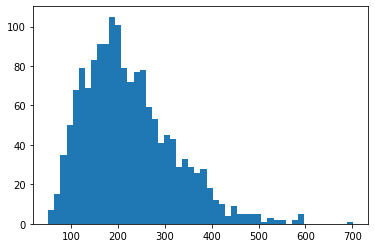

In [ ]:
print("문서 최대 길이 : ", max(len(d) for d in okt_data_end))
print("문서 평균 길이 : ", sum(map(len, okt_data_end))/len(okt_data_end))

plt.hist([len(d) for d in okt_data_end], bins=50)
plt.show()

In [ ]:
# word2vec 모델 학습에 로그를 찍을 수 있도록 합니다.
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [ ]:

model = word2vec.Word2Vec(sentences=okt_data_end, vector_size=500, sorted_vocab=1, window=5, min_count=2, workers=4, sg=0)
model
# def word2vec(docs):
    # for i, doc in enumerate(docs):
    #     model = Word2Vec(sentences=doc, window=5, min_count=10, hs=1, workers=4, sg=0)
    #     word_vec  model.wv
    #     model.init_sims(replace=True)
    #     model.build_vocab(docs)
    #     model.train(docs, total_example=model.corpus_count, epochs=model.iter)
        
# word2vec(okt_data_end)        

In [ ]:
length = len(model.wv)

In [ ]:
vocab.key_to_index

{'했다': 0,
 '하는': 1,
 '있다': 2,
 '기자': 3,
 '있는': 4,
 '한국': 5,
 '서울': 6,
 '지난': 7,
 '북한': 8,
 '대해': 9,
 '미국': 10,
 '됐다': 11,
 '대한': 12,
 '대통령': 13,
 '이번': 14,
 '한다': 15,
 '통해': 16,
 '위해': 17,
 '관련': 18,
 '중국': 19,
 '밝혔다': 20,
 '경찰': 21,
 '된다': 22,
 '이후': 23,
 '정부': 24,
 '하지': 25,
 '같은': 26,
 '대표': 27,
 '있다고': 28,
 '조사': 29,
 '지난해': 30,
 '후보': 31,
 '관계자': 32,
 '대회': 33,
 '했다고': 34,
 '되는': 35,
 '의원': 36,
 '상황': 37,
 '혐의': 38,
 '따르면': 39,
 '최근': 40,
 '진행': 41,
 '시장': 42,
 '현재': 43,
 '하기': 44,
 '확인': 45,
 '주장': 46,
 '하며': 47,
 '예정': 48,
 '결과': 49,
 '설명': 50,
 '지역': 51,
 '하면': 52,
 '이상': 53,
 '해야': 54,
 '입니다': 55,
 '시작': 56,
 '뉴스': 57,
 '세계': 58,
 '한다고': 59,
 '사건': 60,
 '트럼프': 61,
 '오후': 62,
 '경기': 63,
 '회담': 64,
 '모두': 65,
 '입장': 66,
 '가격': 67,
 '있다는': 68,
 '국내': 69,
 '가장': 70,
 '정상회담': 71,
 '만원': 72,
 '이어': 73,
 '당시': 74,
 '일본': 75,
 '수사': 76,
 '공개': 77,
 '게임': 78,
 '모습': 79,
 '가능성': 80,
 '연합뉴스': 81,
 '회장': 82,
 '방송': 83,
 '북미': 84,
 '하면서': 85,
 '없는': 86,
 '올해': 87,
 '사용': 88,
 '계획': 89,
 '라

In [ ]:
vocab = model.wv
vocab

In [ ]:
vocab.index_to_key[length-10:length-1]

['울부짖었다', '덮은', '쿠웨이트', '가자', '테러리스트', '세였다', '돌진', '던진다고', '라즈']

In [ ]:
vocab.index_to_key[0:30]

['했다',
 '하는',
 '있다',
 '기자',
 '있는',
 '한국',
 '서울',
 '지난',
 '북한',
 '대해',
 '미국',
 '됐다',
 '대한',
 '대통령',
 '이번',
 '한다',
 '통해',
 '위해',
 '관련',
 '중국',
 '밝혔다',
 '경찰',
 '된다',
 '이후',
 '정부',
 '하지',
 '같은',
 '대표',
 '있다고',
 '조사']

In [ ]:
vocab['세포']

array([ 2.01075062e-01,  2.85293758e-01,  3.56680423e-01,  2.04312131e-01,
       -7.95696676e-02, -2.83151954e-01,  1.28779128e-01,  6.42160118e-01,
        1.78082108e-01, -5.83938286e-02, -6.46422729e-02,  1.04125932e-01,
        9.24116746e-03, -9.92413983e-03,  1.50430173e-01, -3.09269309e-01,
       -1.11051887e-01, -1.22963637e-01,  3.70580070e-02, -8.04393217e-02,
       -1.10726953e-01, -1.56537503e-01,  1.43286496e-01, -3.18396427e-02,
        3.11324745e-01,  1.19803995e-01,  3.95315960e-02,  8.83240402e-02,
       -4.38079864e-01, -4.07787487e-02,  1.02714434e-01, -9.87336338e-02,
       -1.16575941e-01, -1.79923736e-02,  2.36829758e-01,  1.16961166e-01,
        6.70804232e-02, -2.10272938e-01, -1.02486804e-01, -3.04975480e-01,
       -3.91924977e-02,  4.43797745e-02, -2.39220440e-01,  1.89232558e-01,
       -2.06529647e-01, -1.49012581e-01, -1.87518030e-01,  1.14741519e-01,
        1.00440728e-02, -5.50579652e-02, -9.80861485e-02, -4.68047783e-02,
       -6.57690912e-02, -

In [ ]:
vocab.most_similar('세포')

[('거나', 0.9999073147773743),
 ('시스템', 0.9998993873596191),
 ('현상', 0.9998968243598938),
 ('직장', 0.9998892545700073),
 ('회복', 0.9998852610588074),
 ('주문', 0.9998794198036194),
 ('안정', 0.999873697757721),
 ('활용', 0.9998719692230225),
 ('위험', 0.9998713135719299),
 ('음식', 0.9998683333396912)]

In [ ]:
vocab.doesnt_match('기자 근력 세포 합병증'.split())

'기자'

In [ ]:
vocab.similarity('세포', '합병증')

0.9991067

In [ ]:
vocab.similarity('세포', '기자')

0.5498437

In [ ]:
# https://colab.research.google.com/github/yooseonghwan/OpenDataWrangling/blob/master/03_word2vec%EC%9C%BC%EB%A1%9C_%EB%8B%A8%EC%96%B4%EC%9C%A0%EC%82%AC%EB%8F%84_%EB%B3%B4%EA%B8%B0_teacher.ipynb#scrollTo=8bBh49cJTntr

model_name = 'wv_news'
model.save(model_name)


In [ ]:

v11 = vocab['대한민국']
v12 = vocab['국무위원']
v13 = vocab['기자회견']

v1 = 0.5 * v11 + 0.3 * v12 + 0.2 * v13


v21 = vocab['법적']
v22 = vocab['경영']
v23 = vocab['집회']

v2 = 0.4 * v21 + 0.2 * v22 + 0.4 * v23


In [ ]:
v1

array([ 1.30060092e-01,  2.01309830e-01,  2.94092566e-01,  2.10425913e-01,
       -7.36273080e-02, -2.64160246e-01,  9.35338140e-02,  5.20494759e-01,
        1.77923024e-01,  2.70038377e-03, -4.40820940e-02,  4.03412692e-02,
       -2.22428795e-02,  6.49603456e-02,  1.13436744e-01, -2.83696145e-01,
       -9.58948955e-02, -9.81176645e-02,  2.76106242e-02, -2.45651603e-02,
       -7.76667148e-02, -1.41452372e-01,  6.44251630e-02,  2.65071057e-02,
        2.42612198e-01,  9.38311517e-02,  5.42104943e-03,  1.06818870e-01,
       -3.55827510e-01, -6.78996369e-02,  9.54574868e-02, -5.13950847e-02,
       -7.68000036e-02, -4.38996889e-02,  1.52706265e-01,  6.36578351e-02,
        6.79628402e-02, -1.71344787e-01, -4.94312346e-02, -2.46367663e-01,
       -6.97160736e-02,  6.17707558e-02, -1.87339753e-01,  1.16925672e-01,
       -1.86349615e-01, -1.42272592e-01, -1.59704611e-01,  9.33924168e-02,
        7.97561333e-02, -6.18048152e-03, -5.39666712e-02, -1.04039032e-02,
       -4.42099646e-02, -

In [ ]:

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm     
    
    return similarity

cos_similarity(v1, v2)


0.9841481276206724

In [ ]:

# transformer = TfidfVectorizer()
# transformer.fit(data)
# data_transform = transformer.transform(data) #단어 카운트 가중치

# x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=777, stratify=target)

In [ ]:
# data_transform[0].data

In [ ]:
# data_transform[0]

In [ ]:
# type(data_transform)

In [ ]:
#  ##########모델 생성

# model = MultinomialNB(alpha=1.0)

# ##########모델 학습

# model.fit(x_train, y_train)

# ##########모델 검증

# print(model.score(x_test, y_test)) #1.0

# ##########모델 예측

# x_test = np.array([
#     '우리은행, 인공지능 기반 시장예측시스템 구축 추진'
# ])
# x_test = clean(x_test) #텍스트 정제
# x_test = transformer.transform(x_test) #단어 카운트 가중치

# y_predict = model.predict(x_test)
# label = labels[y_predict[0]]
# y_predict = model.predict_proba(x_test)
# confidence = y_predict[0][y_predict[0].argmax()]

# print(label, confidence) #

In [ ]:
# print(x_test.shape, y_test.shape)

In [ ]:
# x_train.data